In [1]:
pip install dfply

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.4/612.4 kB 3.8 MB/s eta 0:00:00


In [2]:
import pandas as pd
from datetime import date
import calendar
import yfinance as yf
from dfply import *
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

In [47]:
SECURITY_TICKER = 'SPY'
TICK = yf.Ticker(SECURITY_TICKER)

CURR = str(date.today())

START_DATE = "2023-01-01"
END_DATE = "2023-12-31"




In [51]:
# Fetch historical stock data
df = TICK.history(start=START_DATE, end=END_DATE)

# Calculate Day and Night Changes using DFPLY
df['Day_Change'] = (df['Close'] - df['Open']) / df['Open'] * 100

df['Next_Open'] = df >> transmute(Open_Lead=lead(X.Open, 1))
df['Night_Change'] = df >> transmute(Night_Change=X.Next_Open - X.Close)

# Create 'Week_Day' column corresponding to each date's weekday
df['Week_Day'] = df.index.to_series().dt.day_name()

# Convert 'Week_Day' to a categorical type with the specified order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
df['Week_Day'] = pd.Categorical(df['Week_Day'], categories=weekday_order, ordered=True)

# Summary of Day Change by weekday using DFPLY
day_change_summary = (
    df
    >> group_by(X.Week_Day)
    >> summarize(Day_Change_Average=mean(X.Day_Change))
)

night_change_summary = (
    df
    >> group_by(X.Week_Day)
    >> summarize(Night_Change_Average=mean(X.Night_Change))
)

In [49]:
df


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,Day_Change,Next_Open,Night_Change,Week_Day
Date,,,,,,,,,,,,
2023-01-03 00:00:00-05:00,378.615585,380.644742,372.173487,375.118744,74850700,0.0,0.0,0.0,-0.923586,377.443345,2.324601,Tuesday
2023-01-04 00:00:00-05:00,377.443345,380.102935,374.310961,378.014679,85934100,0.0,0.0,0.0,0.151369,376.005220,-2.009459,Wednesday
2023-01-05 00:00:00-05:00,376.005220,376.123419,373.089543,373.700256,76970500,0.0,0.0,0.0,-0.613014,376.881880,3.181624,Thursday
2023-01-06 00:00:00-05:00,376.881880,383.422486,373.729806,382.269989,104189600,0.0,0.0,0.0,1.429655,384.525716,2.255727,Friday
2023-01-09 00:00:00-05:00,384.525716,387.805879,381.866156,382.053284,73978100,0.0,0.0,0.0,-0.642982,381.452441,-0.600842,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22 00:00:00-05:00,473.859985,475.380005,471.700012,473.649994,67126600,0.0,0.0,0.0,-0.044315,474.070007,0.420013,Friday
2023-12-26 00:00:00-05:00,474.070007,476.579987,473.989990,475.649994,55387000,0.0,0.0,0.0,0.333281,475.440002,-0.209991,Tuesday
2023-12-27 00:00:00-05:00,475.440002,476.660004,474.890015,476.510010,68000300,0.0,0.0,0.0,0.225056,476.880005,0.369995,Wednesday



	FROM: 2023-01-01

Day Summary:
    Week_Day  Day_Change_Average
0     Monday            0.261810
1    Tuesday            0.041659
2  Wednesday           -0.096293
3   Thursday            0.008775
4     Friday            0.173248




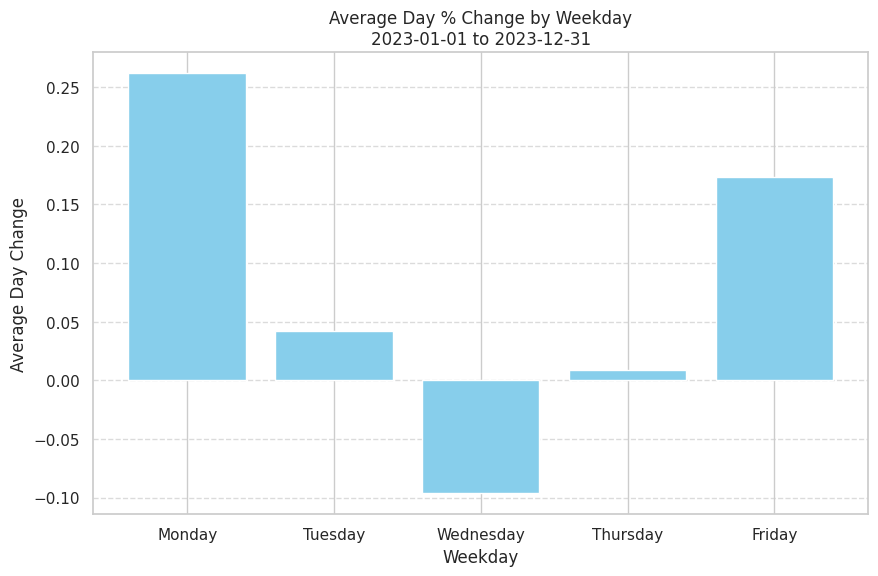


	FROM: 2023-01-01

Night Summary:
    Week_Day  Night_Change_Average
0     Monday             -0.209465
1    Tuesday              0.084306
2  Wednesday              0.395093
3   Thursday              0.140335
4     Friday              0.023464




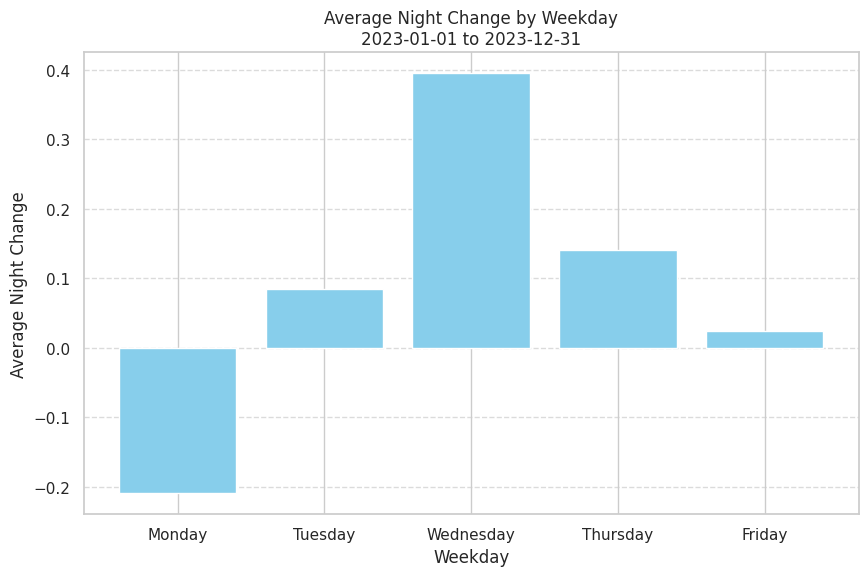

In [34]:
print(f'\n\tFROM: {START_DATE}\n')
print('Day Summary:')
print(day_change_summary)
print('\n')

# Plotting average day change by weekday
plt.figure(figsize=(10, 6))
plt.bar(day_change_summary['Week_Day'], day_change_summary['Day_Change_Average'], color='skyblue')
plt.title(f'Average Day % Change by Weekday\n{START_DATE} to {END_DATE}')
plt.xlabel('Weekday')
plt.ylabel('Average Day Change')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#########################################

print(f'\n\tFROM: {START_DATE}\n')
print('Night Summary:')
print(night_change_summary)
print('\n')

# Plotting average night change by weekday
plt.figure(figsize=(10, 6))
plt.bar(night_change_summary['Week_Day'], night_change_summary['Night_Change_Average'], color='skyblue')
plt.title(f'Average Night Change by Weekday\n{START_DATE} to {END_DATE}')
plt.xlabel('Weekday')
plt.ylabel('Average Night Change')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

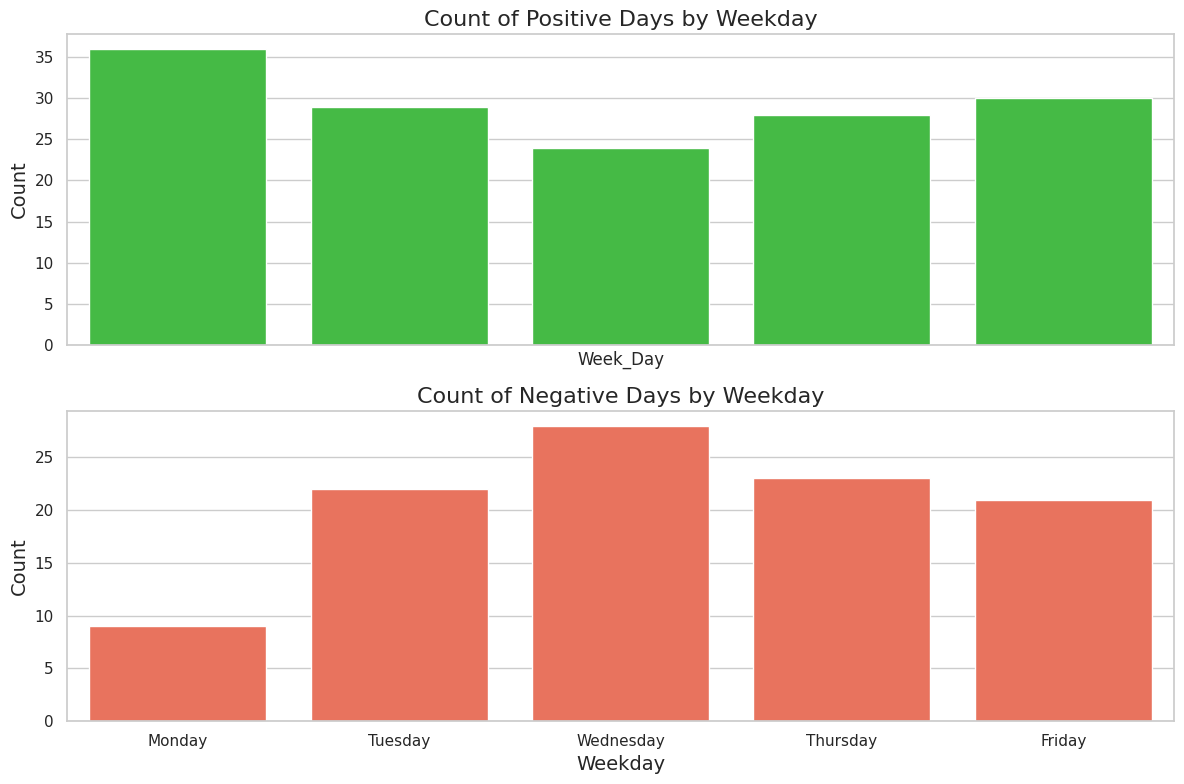

In [23]:
# Count of Positive and Negative Days
positive_counts = df[df['Day_Change'] > 0].groupby('Week_Day').size().reset_index(name='Positive_Days_Count')
negative_counts = df[df['Day_Change'] < 0].groupby('Week_Day').size().reset_index(name='Negative_Days_Count')

# Set Seaborn style
sns.set(style="whitegrid")

# Bar plots for positive and negative days
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8), sharex=True)

# Positive Days
sns.barplot(x=positive_counts['Week_Day'], y=positive_counts['Positive_Days_Count'], color='limegreen', ax=axes[0])
axes[0].set_title('Count of Positive Days by Weekday', fontsize=16)
axes[0].set_ylabel('Count', fontsize=14)

# Negative Days
sns.barplot(x=negative_counts['Week_Day'], y=negative_counts['Negative_Days_Count'], color='tomato', ax=axes[1])
axes[1].set_title('Count of Negative Days by Weekday', fontsize=16)
axes[1].set_xlabel('Weekday', fontsize=14)
axes[1].set_ylabel('Count', fontsize=14)

# Adjust overall layout
plt.tight_layout()
plt.show()

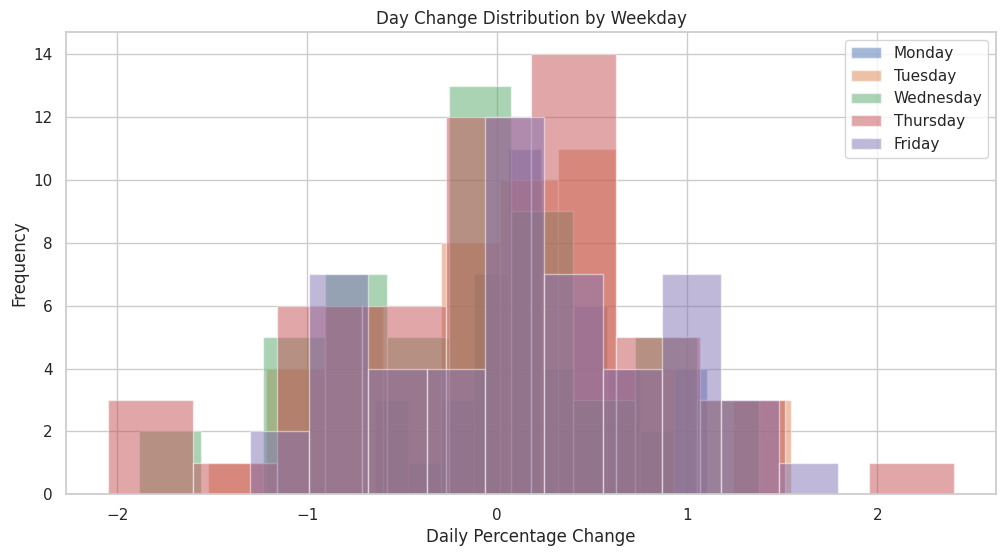


Day Change Percentiles:
    Week_Day  Percentile_25  Percentile_50  Percentile_75
0     Monday       0.035829       0.202571       0.511733
1    Tuesday      -0.360743       0.149530       0.394986
2  Wednesday      -0.585266      -0.079445       0.314437
3   Thursday      -0.464147       0.054615       0.477987
4     Friday      -0.380504       0.139356       0.726442


In [35]:
# Idea 3: Day Change Distribution
plt.figure(figsize=(12, 6))
for day in weekday_order:
    plt.hist(df[df['Week_Day'] == day]['Day_Change'], bins=10, alpha=0.5, label=day)

plt.title('Day Change Distribution by Weekday')
plt.xlabel('Daily Percentage Change')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Idea 4: Day Change Percentiles
day_change_percentiles = (
    df
    >> group_by(X.Week_Day)
    >> summarize(
        Percentile_25=X.Day_Change.quantile(0.25),
        Percentile_50=X.Day_Change.quantile(0.50),
        Percentile_75=X.Day_Change.quantile(0.75)
    )
)

print('\nDay Change Percentiles:')
print(day_change_percentiles)



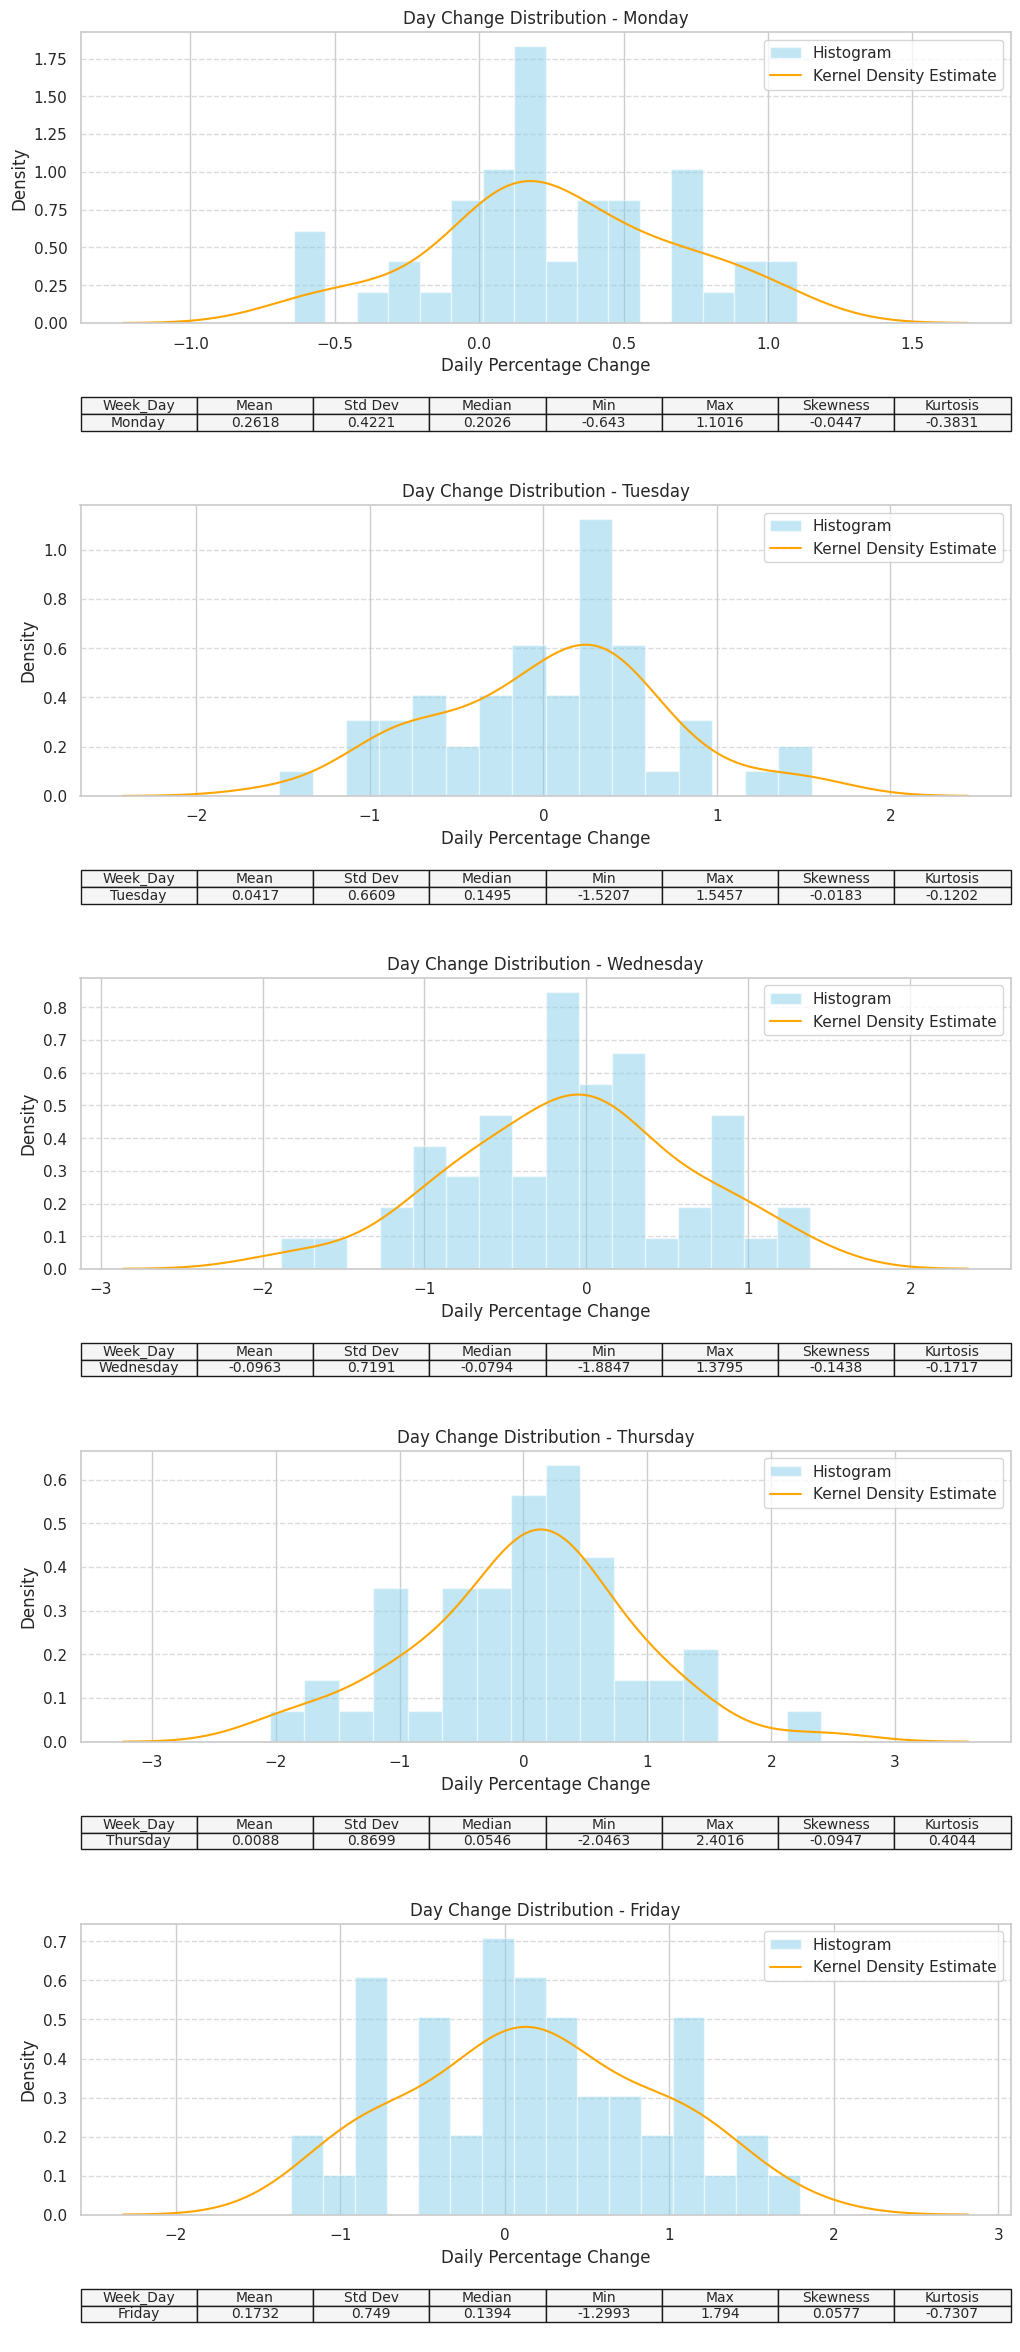

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

# Create subplots for each weekday with two rows
fig, axs = plt.subplots(nrows=10, ncols=1, figsize=(12, 30), gridspec_kw={'height_ratios': [4, 1] * 5, 'hspace': 0.3})

# Plot histograms with kernel density estimate curves for Day Change distribution for each weekday
for i, day in enumerate(weekday_order):
    # Plot Day Change distribution on the upper row
    ax_dist = axs[2 * i]
    ax_dist.hist(df[df['Week_Day'] == day]['Day_Change'], bins=16, alpha=0.5, label='Histogram', color='skyblue', density=True)
    sns.kdeplot(df[df['Week_Day'] == day]['Day_Change'], ax=ax_dist, label='Kernel Density Estimate', color='orange')
    ax_dist.set_title(f'Day Change Distribution - {day}')
    ax_dist.set_xlabel('Daily Percentage Change')
    ax_dist.set_ylabel('Density')
    ax_dist.legend()
    ax_dist.grid(axis='y', linestyle='--', alpha=0.7)

    # Plot summary table on the lower row
    ax_table = axs[2 * i + 1]
    ax_table.axis('off')  # Hide axis for the summary table
    summary_table_day = summary_table[summary_table['Week_Day'] == day]
    table = ax_table.table(cellText=summary_table_day.values, colLabels=summary_table_day.columns,
                           cellLoc='center', loc='center',
                           colColours=['#f5f5f5'] * len(summary_table_day.columns),
                           cellColours=[['#f5f5f5'] * len(summary_table_day.columns)] * len(summary_table_day))
    table.auto_set_font_size(False)
    table.set_fontsize(10)

# Adjust layout to prevent overlap
#plt.tight_layout()

plt.show()
